In [1]:
import sys
print(sys.executable)

C:\Users\Paul5\anaconda3\envs\indicators\python.exe


In [2]:
import datetime

In [2]:
import talib
import bt
import pandas as pd
import matplotlib 
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                  aapl        msft
Date                              
2010-01-04    6.431896   23.211437
2010-01-05    6.443016   23.218935
2010-01-06    6.340532   23.076448
2010-01-07    6.328811   22.836460
2010-01-08    6.370887   22.993954
...                ...         ...
2025-06-02  201.699997  461.970001
2025-06-03  203.270004  462.970001
2025-06-04  202.820007  463.869995
2025-06-05  200.630005  467.679993
2025-06-06  203.919998  470.380005

[3881 rows x 2 columns]


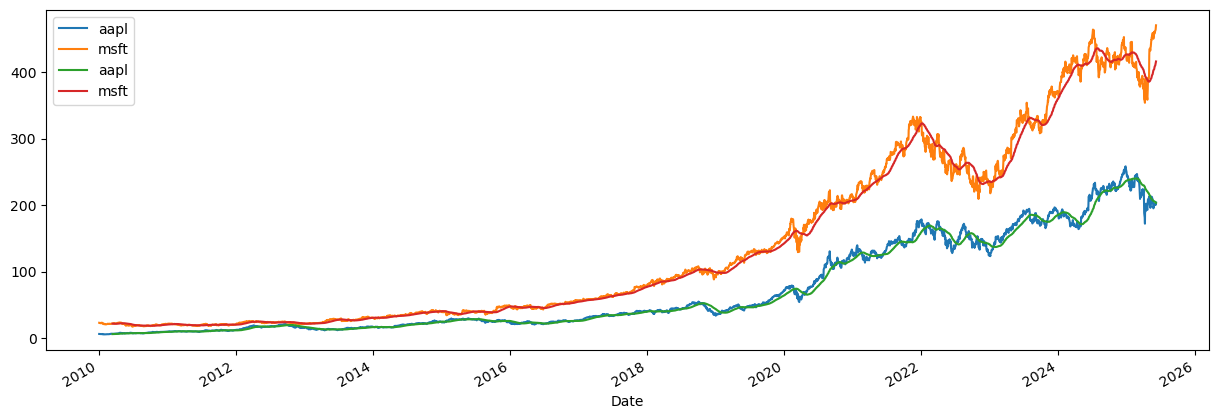

In [2]:
data = bt.get('aapl,msft', start='2010-01-01')
print(data)
# a rolling mean is a moving average, right?
sma = data.rolling(50).mean()
plot = bt.merge(data, sma).plot(figsize=(15, 5))

In [84]:
# Reemplaza tu API key aquí
API_KEY = '95M9E4JWJBTPWLCR'
SYMBOL = 'BAC' # Puedes cambiar esto por el símbolo que desees

# Modificamos la URL para incluir el parámetro 'outputsize=full, Esto le indica a Alpha Vantage que queremos el historial completo disponible.
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={SYMBOL}&outputsize=full&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

# --- Manejo de errores para la respuesta de la API ---
if "Time Series (Daily)" not in data:
    if "Error Message" in data:
        print(f"Error de Alpha Vantage: {data['Error Message']}")
    elif "Note" in data:
        print(f"Nota de Alpha Vantage: {data['Note']}")
        print("Esto podría indicar un límite de frecuencia de llamadas API o datos no disponibles.")
    else:
        print("No se encontraron datos de series de tiempo en la respuesta de la API.")
    # Si no hay datos, salimos del script o manejamos la situación.
    exit() # O puedes return None, etc.

# Accede a la sección de datos de series de tiempo
time_series_data = data['Time Series (Daily)']

# Crea un DataFrame a partir de los datos. 
df = pd.DataFrame.from_dict(time_series_data, orient='index')#La función from_dict() de pandas es muy útil aquí, orient='index' significa que las claves del diccionario externo (las fechas) serán el índice
df.columns = [col.split('. ')[1] for col in df.columns]# Limpia los nombres de las columnas: Los nombres originales tienen "1. open", "2. high", etc. Con ese [1] estas ingresando al segundo elemnto de la lista
df = df.astype(float) # Convierte todas las columnas a float
df.index = pd.to_datetime(df.index) # Convierte el índice a formato de fecha y hora
df = df.sort_index(ascending=True)# Opcional: Ordena por fecha ascendente (las API suelen devolver los datos en orden descendente)
start_date_range = '2017-01-01'
end_date_range = '2025-06-05'
df = df.loc[start_date_range:end_date_range]

print(df.head())
print(df.dtypes)
print(f"\nDatos disponibles desde: {df.index.min()} hasta: {df.index.max()}")
print(f"Número total de filas (días): {len(df)}")

             open   high     low  close      volume
2017-01-03  22.60  22.68  22.200  22.53  99298080.0
2017-01-04  22.72  22.96  22.600  22.95  76846195.0
2017-01-05  22.82  22.93  22.345  22.68  86800397.0
2017-01-06  22.78  22.85  22.560  22.68  66281476.0
2017-01-09  22.51  22.71  22.400  22.55  75886389.0
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

Datos disponibles desde: 2017-01-03 00:00:00 hasta: 2025-06-05 00:00:00
Número total de filas (días): 2118


### Trend Indicators: 
Miden la direccion y fortaleza de la tendencia. Moving Avarega  (MA) and Average Directional Movement Index (ADX)

Diferencia entre SMA y EMA. Ema da mas peso a datos recientes mientras que la SMAda el mismo peso a todos los puntos de los datos.

             open    high     low  close      volume     EMA_12     EMA_26
2017-01-03  22.60  22.680  22.200  22.53  99298080.0        NaN        NaN
2017-01-04  22.72  22.960  22.600  22.95  76846195.0        NaN        NaN
2017-01-05  22.82  22.930  22.345  22.68  86800397.0        NaN        NaN
2017-01-06  22.78  22.850  22.560  22.68  66281476.0        NaN        NaN
2017-01-09  22.51  22.710  22.400  22.55  75886389.0        NaN        NaN
...           ...     ...     ...    ...         ...        ...        ...
2025-05-30  44.19  44.300  43.720  44.13  66537474.0  43.701054  42.681331
2025-06-02  43.88  44.150  43.360  44.08  28582598.0  43.759354  42.784936
2025-06-03  44.01  44.730  43.940  44.65  31320154.0  43.896376  42.923089
2025-06-04  44.60  45.090  44.340  44.36  30591708.0  43.967703  43.029527
2025-06-05  44.45  44.575  44.010  44.38  32036157.0  44.031133  43.129562

[2118 rows x 7 columns]


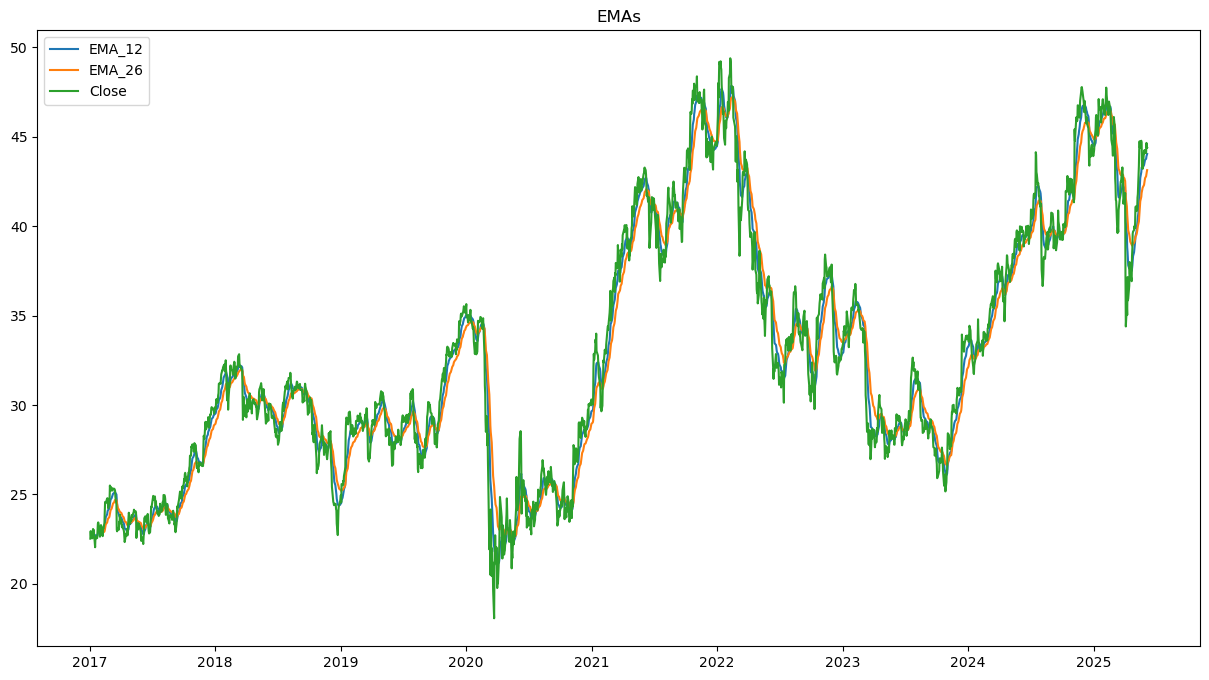

In [85]:
# stock_data = bt.get('aapl', start='2022-01-01')
# Calculate 12-day EMA
df['EMA_12'] = talib.EMA(df['close'], timeperiod=12)
# Calculate 26-day EMA
df['EMA_26'] = talib.EMA(df['close'], timeperiod=26)
print(df)

# Plot the EMAs with price
plt.figure(figsize=(15, 8))
plt.plot(df['EMA_12'], label='EMA_12')
plt.plot(df['EMA_26'], label='EMA_26')
plt.plot(df['close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

# ADX
 Mide la fuerza de una tendencia. Pero no muestra si es una tendencia alcista o bajista.
 ADX <= 25 : No tiene una tendencia clara
 ADX > 25 : Mercado en Tendencia
 ADX > 50 : Mercado con tendencia fuerte

 Mientras mas grande sea el timeperiod menos sensible sera el ADX a las fluctuaciones. Por ejemplo un trader que busca a largo plazo puede usar un time period mas grande.

Normalmente se lo grafica con el precio para ver como los cambios de este han pasado

Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).


             open   high     low  close      volume  EMA_12  EMA_26  ADX_14  \
2017-01-03  22.60  22.68  22.200  22.53  99298080.0     NaN     NaN     NaN   
2017-01-04  22.72  22.96  22.600  22.95  76846195.0     NaN     NaN     NaN   
2017-01-05  22.82  22.93  22.345  22.68  86800397.0     NaN     NaN     NaN   
2017-01-06  22.78  22.85  22.560  22.68  66281476.0     NaN     NaN     NaN   
2017-01-09  22.51  22.71  22.400  22.55  75886389.0     NaN     NaN     NaN   

            ADX_21  
2017-01-03     NaN  
2017-01-04     NaN  
2017-01-05     NaN  
2017-01-06     NaN  
2017-01-09     NaN  


Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3382 ticks ([17016.0, ..., 20397.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

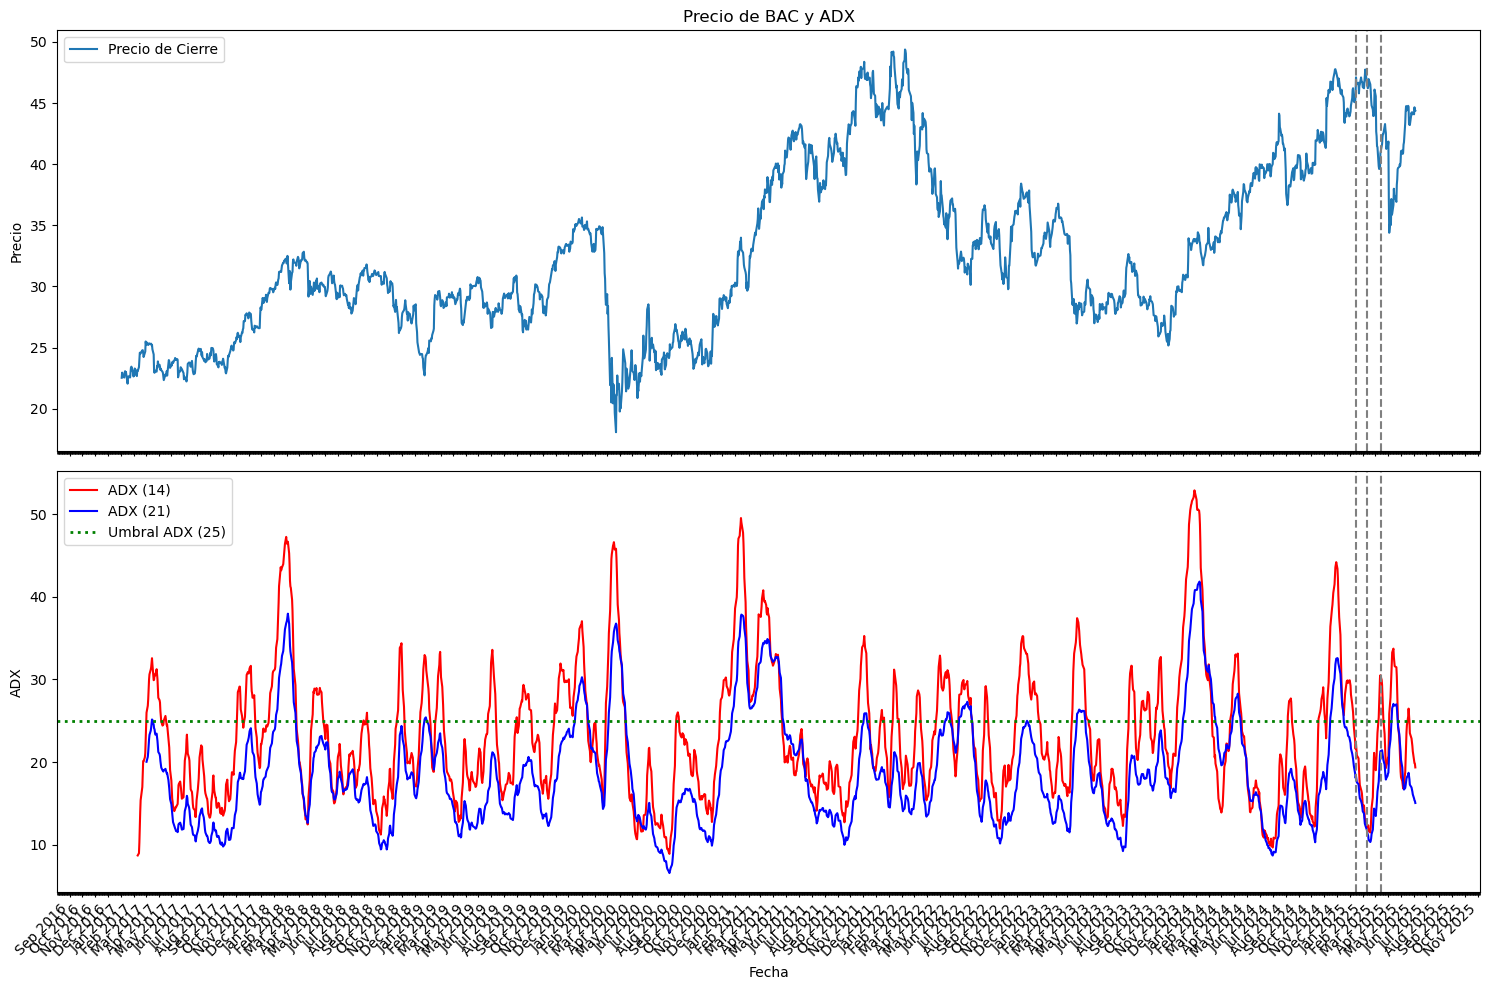

In [86]:
# Calculate the ADX with the default time period
df['ADX_14'] = talib.ADX(df['high'],
                            df['low'], 
                            df['close'])

# Calculate the ADX with the time period set to 21
df['ADX_21'] = talib.ADX(df['high'],
                            df['low'], 
                            df['close'], timeperiod=21)

# Print the last five rows
print(df.head())

## Ajustar el Tamaño de los Subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10), sharex=True) # sharex=True para que ambos ejes x estén sincronizados

# Plot ADX with the price
ax1.set_ylabel('Precio')
ax1.plot(df['close'], label='Precio de Cierre')
ax1.legend() # Mostrar leyenda en ax1

ax2.set_ylabel('ADX')
ax2.plot(df['ADX_14'], color='red', label='ADX (14)')
ax2.plot(df['ADX_21'], color='blue', label='ADX (21)') # Plotear también ADX_21
ax2.legend() # Mostrar leyenda en ax2

# ---
## Trazar Líneas Verticales en Fechas Específicas

# Define las fechas donde quieres trazar las líneas verticales
# Asegúrate de que las fechas estén en formato datetime
vertical_lines_dates = [
    datetime(2025, 1, 14), # Ejemplo: 1 de junio de 2022
    datetime(2025, 2, 10), # Ejemplo: 1 de enero de 2023
    datetime(2025, 3, 15) # Ejemplo: 15 de marzo de 2024
]

# Itera sobre las fechas y dibuja una línea vertical en cada subplot
for date in vertical_lines_dates:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=1.5, label=f'Línea vertical {date.year}')
    ax2.axvline(x=date, color='gray', linestyle='--', linewidth=1.5) # No repetir la etiqueta en el segundo subplot


## Mejoras en el Eje X (Inclinación y Formato de Meses)

# Aplicar el formato de fechas a ambos subplots (gracias a sharex=True, basta con ax2)
# Configurar los localizadores de fechas (para mostrar ticks en cada mes, por ejemplo)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Muestra un tick cada mes
ax2.xaxis.set_minor_locator(mdates.DayLocator(interval=1)) # Ticks menores cada día (opcional, para zoom)
ax2.axhline(y=25, color='green', linestyle=':', linewidth=2, label='Umbral ADX (25)')
ax2.legend() # Actualiza la leyenda para incluir la nueva línea

# Formatear las etiquetas del eje X
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # 'Mes AAAA' (ej. 'Ene 2022')

# Inclinar las etiquetas del eje X
fig.autofmt_xdate(rotation=45) # Inclina las etiquetas 45 grados

# Ajustes de títulos y etiquetas
ax1.set_title(f'Precio de {SYMBOL} y ADX')
ax2.set_xlabel('Fecha') # Etiqueta del eje X solo en el subplot inferior
plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()

# Momentum

Es la velocidad de subida o bajada de los precios.

RSI > 70 : Un mercado sobrevalorado que indica que el precio podria revertirse.
RSI < 30 : COndicion de sobreventa lo que significa que esta subvaluado y el precio podria subir.


 Ten en cuenta que cuanto mas larga sea el timeperiod, menos sensible sera a las fluctuaciones del precio.

 

             open    high     low  close       volume     EMA_12  EMA_26  \
2017-01-03  22.60  22.680  22.200  22.53   99298080.0        NaN     NaN   
2017-01-04  22.72  22.960  22.600  22.95   76846195.0        NaN     NaN   
2017-01-05  22.82  22.930  22.345  22.68   86800397.0        NaN     NaN   
2017-01-06  22.78  22.850  22.560  22.68   66281476.0        NaN     NaN   
2017-01-09  22.51  22.710  22.400  22.55   75886389.0        NaN     NaN   
2017-01-10  22.59  23.140  22.540  22.94  100977665.0        NaN     NaN   
2017-01-11  22.94  23.070  22.720  23.07   92385551.0        NaN     NaN   
2017-01-12  23.01  23.120  22.610  22.92  120274108.0        NaN     NaN   
2017-01-13  23.21  23.409  22.800  23.01  161874990.0        NaN     NaN   
2017-01-17  22.68  22.790  22.010  22.05  152495923.0        NaN     NaN   
2017-01-18  22.30  22.650  22.100  22.63  124323059.0        NaN     NaN   
2017-01-19  22.73  22.810  22.410  22.53   75990836.0  22.711667     NaN   
2017-01-20  

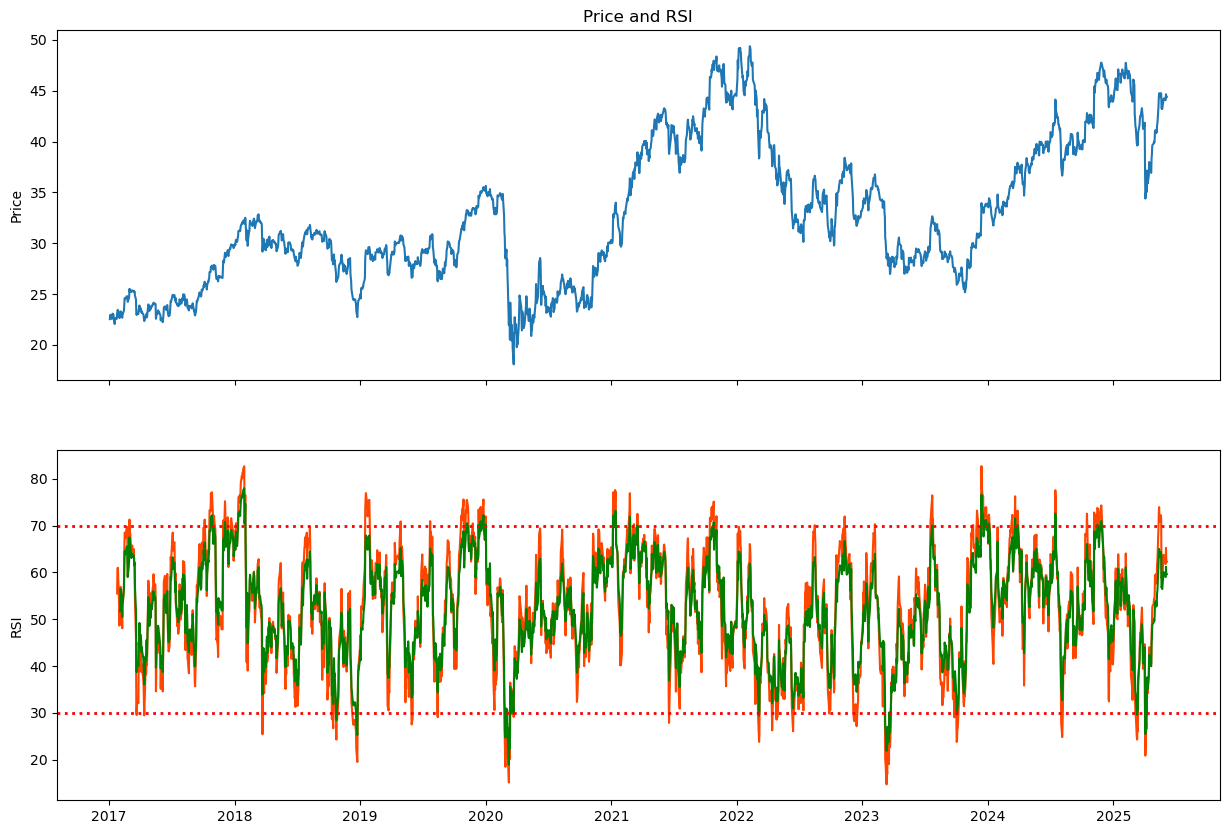

In [87]:
# Calculate RSI with the default time period
df['RSI_14'] = talib.RSI(df['close'])

# Calculate RSI with a time period of 21
df['RSI_21'] = talib.RSI(df['close'],timeperiod=21)

# Print the last five rows
print(df.head(25))


# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10), sharex=True)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(df['close'])
ax2.set_ylabel('RSI')
ax2.plot(df['RSI_14'], color='orangered')
ax2.plot(df['RSI_21'], color='green')

ax2.axhline(y=30, color='red', linestyle=':', linewidth=2, label='RSI 30')
ax2.axhline(y=70, color='red', linestyle=':', linewidth=2, label='RSI 70')

ax1.set_title('Price and RSI')
plt.show()

# Volatility

Bollinger Bands: Measure price volatility
tres lineas: la del medio es una SMA, la de arriba la desviasion estandar arriba de la SMA, y la otra la desviation standar abajo de la linea del medio.

Por ejemplo un trader puede escoger una media SMA de 10 y desviaciones estandares de 1.5 para un corto plazo. O una sma 50 y 2.5 para una estrategia a largo plazo.

Mientras mas anchas sean las bandas hay mas volatiladad en lso precios de los activos.

Estadisticamente hablado si las bandsa superiores e inferio se basan en 1 deviacion estandar contienen alrederos del 68% de los movimientos de los precios recientes. Si las desviaciones son 2 contienen aproximadamente el 95% de los moviemientos recientes del precio. solo se mueve fuera del precio en el 5% de los casos si se usa 95% de confianza.

Si el precio esta cerca de la banda superior es relativamente caro, y barato cuando esta cerca de la banda inferior.

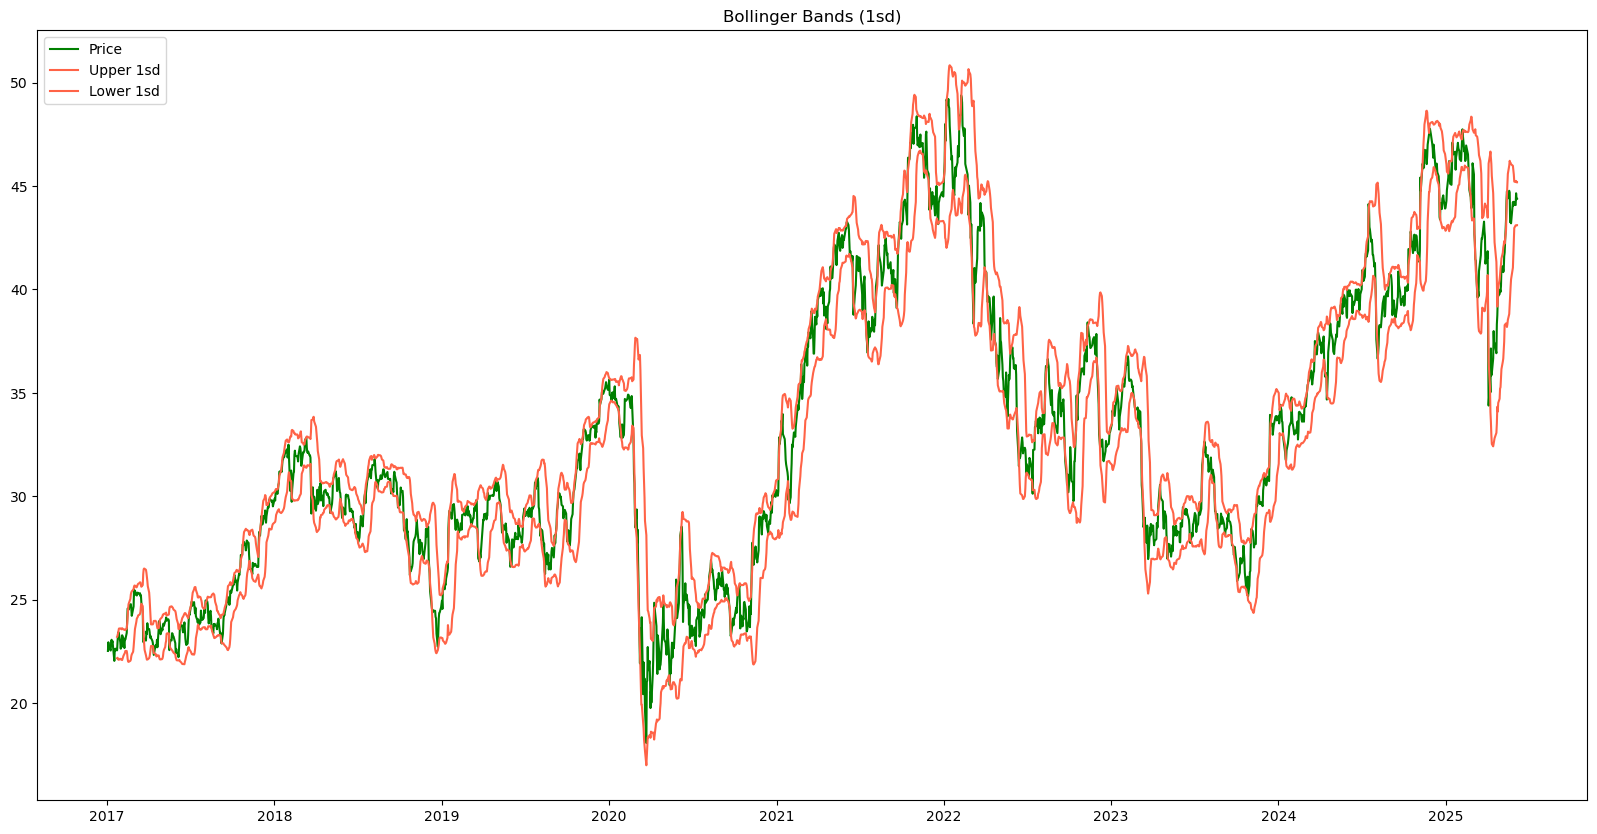

In [89]:
# Define the Bollinger Bands with 1-sd
upper_1sd, mid_1sd, lower_1sd = talib.BBANDS(df['close'], 
                                     nbdevup = 2,
                                     nbdevdn = 2,
                                     timeperiod=14)
# Plot the upper and lower Bollinger Bands 
plt.figure(figsize=(20, 10))
plt.plot(df['close'], color='green', label='Price')
plt.plot(upper_1sd, color='tomato', label="Upper 1sd")
plt.plot(lower_1sd, color='tomato', label='Lower 1sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (1sd)')
plt.show()

## Trading Signals

Senales de trading puden ser construidas de:
- Uno o varios indicadores o una combinacion de market data y indicadores.
- Trading algoritmico
- SelectWhere en la libreria BT para filtrar niveles de precios.
- WeightTarget
- El grafico muestra como incrementa el capital, las lineas planas indican cuando no tenemos ninguna posicion

            close
2017-01-03  False
2017-01-04  False
2017-01-05  False
2017-01-06  False
2017-01-09  False
...           ...
2025-05-30   True
2025-06-02   True
2025-06-03   True
2025-06-04   True
2025-06-05   True

[2118 rows x 1 columns]


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


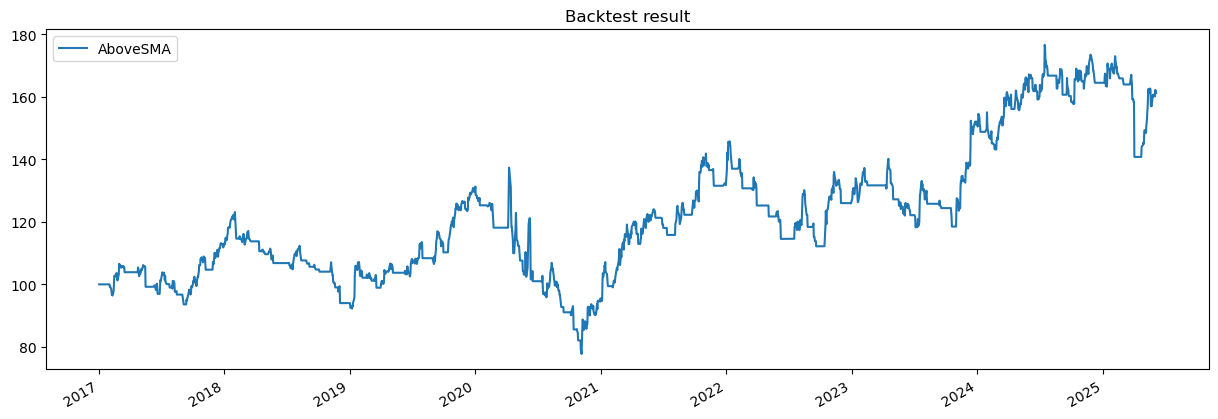

Stat                 AboveSMA
-------------------  ----------
Start                2017-01-02
End                  2025-06-05
Risk-free rate       0.00%

Total Return         61.20%
Daily Sharpe         0.38
Daily Sortino        0.62
CAGR                 5.83%
Max Drawdown         -43.37%
Calmar Ratio         0.13

MTD                  0.57%
3m                   -1.66%
6m                   -4.26%
YTD                  -1.98%
1Y                   -3.48%
3Y (ann.)            10.35%
5Y (ann.)            6.19%
10Y (ann.)           -
Since Incep. (ann.)  5.83%

Daily Sharpe         0.38
Daily Sortino        0.62
Daily Mean (ann.)    7.65%
Daily Vol (ann.)     19.90%
Daily Skew           0.50
Daily Kurt           17.27
Best Day             14.19%
Worst Day            -11.06%

Monthly Sharpe       0.40
Monthly Sortino      0.81
Monthly Mean (ann.)  7.39%
Monthly Vol (ann.)   18.70%
Monthly Skew         0.37
Monthly Kurt         0.15
Best Month           15.49%
Worst Month          -14.10%

Yea

In [93]:
data = pd.DataFrame(df["close"])
sma = data.rolling(20).mean()
signal = (data > sma)
print(signal)
# Define the strategy
bt_strategy = bt.Strategy('AboveSMA',
                          [bt.algos.SelectWhere(signal),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()
bt_result.display()

100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


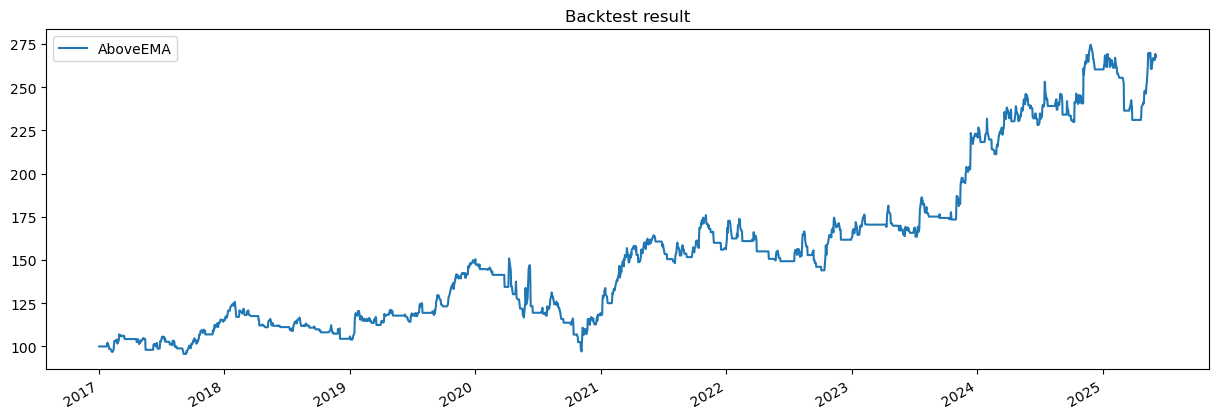

Stat                 AboveEMA
-------------------  ----------
Start                2017-01-02
End                  2025-06-05
Risk-free rate       0.00%

Total Return         167.64%
Daily Sharpe         0.69
Daily Sortino        1.16
CAGR                 12.40%
Max Drawdown         -35.68%
Calmar Ratio         0.35

MTD                  0.57%
3m                   13.18%
6m                   0.43%
YTD                  2.82%
1Y                   11.77%
3Y (ann.)            20.98%
5Y (ann.)            13.06%
10Y (ann.)           -
Since Incep. (ann.)  12.40%

Daily Sharpe         0.69
Daily Sortino        1.16
Daily Mean (ann.)    13.67%
Daily Vol (ann.)     19.84%
Daily Skew           0.97
Daily Kurt           15.97
Best Day             14.19%
Worst Day            -10.04%

Monthly Sharpe       0.73
Monthly Sortino      1.72
Monthly Mean (ann.)  13.60%
Monthly Vol (ann.)   18.68%
Monthly Skew         0.54
Monthly Kurt         -0.15
Best Month           15.76%
Worst Month          -9.88%


In [94]:
data = pd.DataFrame(df["close"])
ema = talib.EMA(data['close'].to_numpy(), timeperiod=15)
ema = pd.Series(ema, index=data.index, name='EMA_15_close').to_frame(name='close')
signal = (data > ema)
# signal = (data["close"] > ema).to_frame(name='close') CUando tienes un data frame y una serie de EMA,

# # Define the strategy
bt_strategy_EMA = bt.Strategy('AboveEMA',
                          [bt.algos.SelectWhere(signal),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest_EMA = bt.Backtest(bt_strategy_EMA, data)
bt_result_EMA = bt.run(bt_backtest_EMA)
# Plot the backtest result
bt_result_EMA.plot(title='Backtest result')
plt.show()
bt_result_EMA.display()

#if signal is a Series without an explicit name, or if you don't provide 
#a name when converting it, it might default to a numeric column name (like 0). 
#However, bt often expects the column names in the selection data to correspond 
#to the asset names in your main data DataFrame.

# Trend Following Extrategy

- Trend Following
    - Apuesta a que la tendencia del precio continuara en la misma direccion
    - Aplicar el SMA o EMA es uno de este tipo de estrategias. Otros indicadores son MA, ADX para construir estas senales.

- Mean reversion strategies
    - Apuestan a que cuando el mercado alcanza una condicion de sobrecompra o sobreventa, el precio tiende a revertirse hacia la media.
    - RSI, Bollinger Bands, to construct trending signals.

## MA crossover Strategy
- Long Signal: the short-term EMA crosses above the long-term EMA. Price picking up momentum
- Short Signal: The shrt-term EMA crosses below the long-term EMA

COnstruimos la senal copiando el DataFrame del indicador EMA con el metodo de copia de puntos.
signal = EMA_long.copy()
signal[Ema_long.isnull()] = 0  Establecemos el valor de la senal en 0 para los periodos iniciales que no tienen suficientes puntos para la ema
signal[EMA_short > EMA_long] = 1 inidca largo
signal[EMA_short < EMA_long] = -1 indica short


bt. merge = Toma varios dataframes y los funciona en uno basicamente en el dindice del dataframe, en este caso la fecha.

Dado que la senal tiene una escala diferente a la del precio y los datos de la EMA, defina secondary_y=[signal]

El grafico ofrece una indicacion clara de donde tomar posiciones largas y cortas.

Aqui la senal no se construye directamente de la comparacion de precios, por lo que utilizaemos otro metodo proporcionado por bt call WeighTarget

In [ ]:
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

# Merge the data 
combined_df = bt.merge(signal, price_data,EMA_short, EMA_long)
combined_df.columns = ['signal', 'Price', 'EMA_short', 'EMA_long']
# Plot the signal, price and MAs
combined_df.plot(secondary_y=['signal'])
plt.show()

In [ ]:
# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover', 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

## Mean reverse strategy

Buy the fear and sell the greed

Se hace con el RSI donde mas de 70 es un indicador de venta y menos de 30 es de compra:

No ponemos el RSI con el precio en el grafico ya que esta en escalas diferentes


In [ ]:
# Construct the signal
signal[stock_rsi > 70] = -1
signal[stock_rsi < 30] = 1
signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

# Define the strategy
bt_strategy = bt.Strategy('RSI_MeanReversion', 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

# Strategy optimization and benchmarking
Esto nos permite realizar comparaciones de diferentes parametors, por exemplo difrentes SMA , para probar una variedad de valores de los paramtros de entrada para encontrar aquellos que brinden un mejor rendimiento de la estraegia en funcion de los datos historicos.

Benchmark: Un punto de referncia es un estandar o punto de comparacion con el cual se puede compara y evaluar una estrategia. Por ejemplo una estrategia que utiliza senales para operar activamente acciones puede usar una estrategia pasoiva de compra y retencion como referencia.

Tambien se puede elegir un indice de referentcia en funcion a los segmentos del mercado y **los perfiles de riesgo de los activos**


In [ ]:
# Comparar varias SMA
def signal_strategy(price_data, period, name):
    # Calculate SMA
    sma = price_data.rolling(period).mean()
    # Define the signal-based Strategy
    bt_strategy = bt.Strategy(name, 
                              [name,
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

# Create signal strategy backtest
sma10 = signal_strategy(price_data, period=10, name='SMA10')
sma30 = signal_strategy(price_data, period=30, name='SMA30')
sma50 = signal_strategy(price_data, period=50, name='SMA50')

# Run all backtests and plot the resutls
bt_results = bt.run(sma10,sma30,sma50)
bt_results.plot(title='Strategy optimization')
plt.show()

In [ ]:
# Estrategia de solo holdear
def buy_and_hold(price_data, name):
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data

# Create benchmark strategy backtest
benchmark = buy_and_hold(price_data, name='benchmark')

# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50, benchmark)
bt_results.plot(title='Strategy benchmarking')
plt.show()

## Get stats of the backtest

Puedes ver todos los estadisticos que puedes obtener de la libreria BT
resInfo = bt_results.stats
print(resInfo.index)

CAGR(Compound annual growth rate) = Es la tasa de rendimiento que se requriria para un activo o una cuenta cometcial crezca a partir de su valor saldo inidcial a su saldo final, asumiendo que todas las ganacias se reinvirtieron al final de cada ano.

Interpretación de los Resultados
En este ejemplo, el CAGR es del 11.84%.

¿Qué significa esto?

Crecimiento Anual Promedio: Significa que si tu inversión hubiera crecido a una tasa constante del 11.84% cada año durante los 5 años, con todas las ganancias reinvertidas, habrías terminado con $1,750 partiendo de $1,000.

Suaviza la Volatilidad: Observa los valores anuales: hubo un año (Año 2) donde el valor disminuyó. El CAGR "suaviza" estas fluctuaciones para darte una tasa de crecimiento anualizada consistente. No significa que tu inversión creció exactamente un 11.84% cada año; es un promedio compuesto.

Comparación: Este 11.84% es una cifra que puedes usar para comparar el rendimiento de esta inversión con otras. Por ejemplo, si otra inversión similar tuvo un CAGR del 8% en el mismo período, esta inversión se habría desempeñado mejor en términos de crecimiento anual compuesto.

Realidad vs. Cálculo: Es crucial entender que el CAGR es una tasa hipotética y suavizada. No refleja los altibajos reales de la inversión año a año. En la vida real, tu inversión pudo haber tenido años con rendimientos mucho más altos o más bajos que el 11.84%. El CAGR es una herramienta para entender la tendencia de crecimiento general.

¿Cuándo es útil el CAGR?
Visualizar el progreso: Te da una idea clara de cuán "rápido" ha crecido algo en un período.
Comparar rendimientos: Es ideal para comparar el desempeño de diferentes activos o proyectos a lo largo del tiempo, ya que elimina el ruido de la volatilidad anual.
Establecer expectativas: Si una empresa ha tenido un CAGR del 15% en los últimos 10 años, podría ser razonable esperar un crecimiento similar en el futuro, aunque siempre con precaución.

In [ ]:
# Obtain all backtest stats
resInfo = bt_result.stats

# Get daily, monthly, and yearly returns
print('Daily return: %.4f'% resInfo.loc["daily_mean"])
print('Monthly return: %.4f'% resInfo.loc["monthly_mean"])
print('Yearly return: %.4f'% resInfo.loc["yearly_mean"])

# Get the compound annual growth rate
print('Compound annual growth rate: %.4f'% resInfo.loc["cagr"])

In [ ]:
# Plot the daily return histogram
bt_result.plot_histograms(bins=50)
plt.show()

# Plot the weekly return histogram
bt_result.plot_histograms(bins=50, freq='w')
plt.show()

In [ ]:
# Compare Returns of multiples strategies

# Plot the backtest result
bt_results.plot(title='Backtest result')
plt.show()

# Get the lookback returns
lookback_returns = bt_results.display_lookback_returns()
print(lookback_returns)

# Drawdown

Es una metrica de evalucion del desempeno llamada reduccion. Compara el cambio porcentual entre un pico y una bajda, este considera la caida maxima

# CALMAR RATIO

Se consigue debidiendo el CAGR/Max Drowdown, Un ratio alto mejor sera el rendimiento de la estrategia en terminos ajustados al riesgo durante el perioodod de tiempo determinado. Un valor mayor de tres es considerado excellente




In [ ]:
# Obtain all backtest stats
resInfo = bt_result.stats

# Get the average drawdown
avg_drawdown = resInfo.loc['avg_drawdown']
print('Average drawdown: %.2f'% avg_drawdown)

# Get the average drawdown days
avg_drawdown_days = resInfo.loc['avg_drawdown_days']
print('Average drawdown days: %.0f'% avg_drawdown_days)

In [ ]:
# Get the CAGR
cagr = resInfo.loc['cagr']
print('Compound annual growth rate: %.4f'% cagr)

# Get the max drawdown
max_drawdown = resInfo.loc['max_drawdown']
print('Maximum drawdown: %.2f'% max_drawdown)

# Calculate Calmar ratio manually
calmar_calc = cagr / max_drawdown * (-1)
print('Calmar Ratio calculated: %.2f'% calmar_calc)

# Get the Calmar ratio
calmar =  resInfo.loc['calmar']
print('Calmar Ratio: %.2f'% calmar)

# Sharpe ratio and Sortino ratio


Para que el rendimiento entre diferentes estrategias sea comparable, debemos tener en cuenta tanto el rendimiento como el riesgo.

# Sharpe ratio 

Medida ajustada al riesgo. Se calcula como el rendimeinto medio en exceso de la tasa libre de riesgo, dividado por la volatidlidad del exceso de retorno, es decir la desviacion estandar.

Sharpe Ratio = (Return of the Strategy - Risk_Free rate) / Desviation standar

El riesgo libre de riesdo es el equivalente a un bono del seguro y libre del riesgo como los bonos del tesoros o los bonos del estados unidos. CUanda la tasa es negativa el risk free rate es cero.

Mientras mas grande el sharpe ratio es mejor el retorno. 

**Un problema que tiene esteindicador es que no discrimina entre votalidad a la alza o la baja, castiga a mabas por igual. Es por esto que usamos e sortino, que solo castiga la volatilidad a la baja, a la izquierda del grafico de distribucion o campaa de gauss, no considera valores a la deracha de la mediana.**



In [ ]:
# Get annual return and volatility
yearly_return = resInfo.loc["yearly_mean"]
print('Annual return: %.2f'% yearly_return)
yearly_vol = resInfo.loc["yearly_vol"]
print('Annual volatility: %.2f'% yearly_vol)

# Calculate the Sharpe ratio manually
sharpe_ratio = yearly_return / yearly_vol
print('Sharpe ratio calculated: %.2f'% sharpe_ratio)

# Print the Sharpe ratio
print('Sharpe ratio %.2f'% resInfo.loc["yearly_sharpe"])

# Print annual Sortino ratio
yearly_sortino = resInfo.loc['yearly_sortino']
print('Annual Sortino ratio: %.2f'% yearly_sortino)

# Print monthly Sortino ratio
monthly_sortino = resInfo.loc['monthly_sortino']
print('Monthly Sortino ratio %.2f'% monthly_sortino)